In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [6]:
plt.rc('font', family='Malgun Gothic')

# =========================================================

In [7]:
# customer_merge_Category 데이터 불러오기

df_cus_pp = pd.read_csv("customer_merge_Category.csv", engine='python', encoding="utf-8")
df_cus_pp.head()

,Unnamed: 0,Unnamed: 0.1,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region,한식,중식,일식,양식,분식,카페
0,0,0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시,22.0,35.0,13.0,13.0,0.0,0.0
2,2,2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도,1.0,1.0,0.0,0.0,1.0,0.0
4,4,4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도,2.0,0.0,2.0,2.0,2.0,0.0


In [31]:
# 'Unnamed: 0', 'Unnamed: 0.1' 열 제거

# df_cus_pp = df_cus_pp.drop('Unnamed: 0', axis=1)
# df_cus_pp = df_cus_pp.drop('Unnamed: 0.1', axis=1)
df_cus_pp = df_cus_pp.drop('region', axis=1)
df_cus_pp = df_cus_pp.drop('주문자ID', axis=1)

In [40]:
df_cus_pp.rename(columns={'가입-최종주문기간':'가입_최종주문기간'}, inplace=True)

In [32]:
# 변수 더미화

df_cus_pp_dummy = pd.get_dummies(df_cus_pp)
df_cus_pp_dummy.head()

,상품구매금액,나이,가입-최종주문기간,한식,중식,일식,양식,분식,카페,성별_남자,...,AgeGroup_45-49,AgeGroup_50-54,AgeGroup_55-59,AgeGroup_60-64,AgeGroup_65-69,AgeGroup_70-74,AgeGroup_75-79,AgeGroup_80-84,AgeGroup_85-89,AgeGroup_90-94
0,103300,47,0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
1,4308520,27,141,22.0,35.0,13.0,13.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,71050,41,102,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,76400,47,0,1.0,1.0,0.0,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
4,360800,47,0,2.0,0.0,2.0,2.0,2.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


# =========================================================

# Decision Tree (구매력)

    y = 상품구매금액
    x = 중요도 top 10
    1.  중식	               0.69
    2.  한식	               0.18
    3.	AgeGroup_70-74	     0.06
    4.	가입_최종주문기간    0.03
    5.	일식	               0.02
    6.	유입경로_블로그광고	0.01
    7.	유입경로_기타	       0.01
    8.	성별	               0.00
    9.	회원구분_사업자	  0.00
    10.	카페	               0.00

# 각 중요도에 대한 시각화 - 평균구매금액 기준

In [52]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
# 1.
# 중식 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_chi_m = pd.pivot_table(data=df_cus_pp, index=('중식'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_chi_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_chi_m

,중식,평균구매금액
0,0.00,298510.57
1,1.00,177361.24
2,2.00,281747.12
3,3.00,440555.14
4,4.00,611679.65
...,...,...
67,109.00,19956830.00
68,116.00,18170120.00
69,134.00,14615130.00
70,148.00,28514575.00


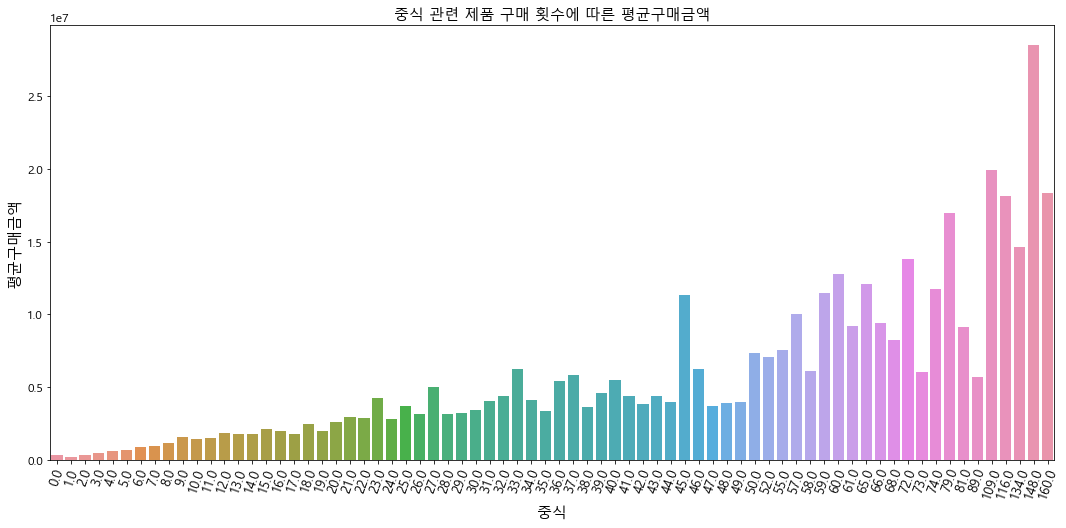

In [51]:
# 1. 
# x = 중식(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("중식 관련 제품 구매 횟수에 따른 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax1 = sns.barplot(data=df_cus_pp_chi_m, y='평균구매금액', x='중식')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(70)

In [55]:
# 2.
# 한식 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_kor_m = pd.pivot_table(data=df_cus_pp, index=('한식'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_kor_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_kor_m

,한식,평균구매금액
0,0.00,556837.41
1,1.00,124234.74
2,2.00,223210.29
3,3.00,316899.85
4,4.00,445120.68
...,...,...
68,112.00,11740600.00
69,115.00,18170120.00
70,116.00,9105510.00
71,121.00,12080490.00


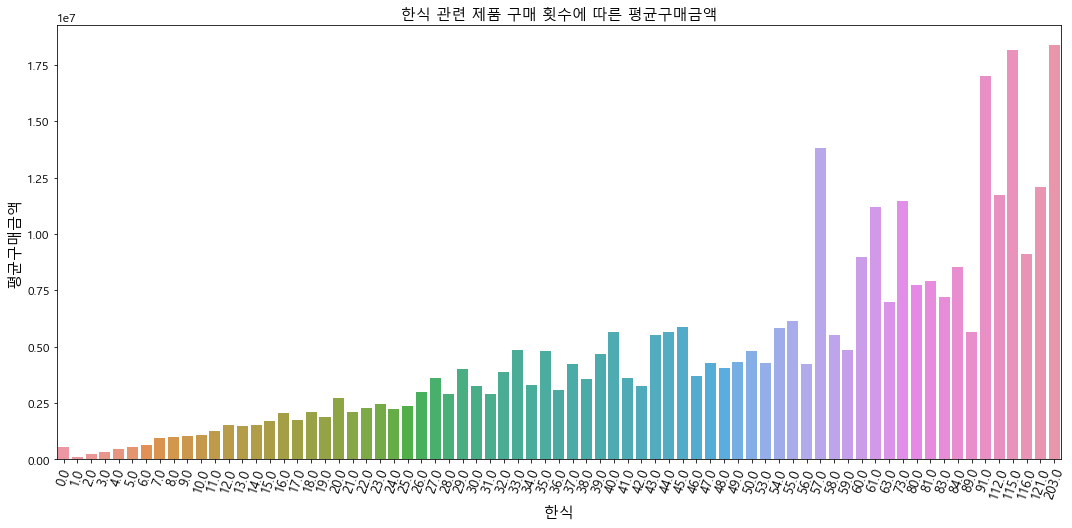

In [57]:
# 2.
# x = 한식(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("한식 관련 제품 구매 횟수에 따른 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax2 = sns.barplot(data=df_cus_pp_kor_m, y='평균구매금액', x='한식')

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(70)

In [58]:
# 3.
# AgeGroup_70-74 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_70_m = pd.pivot_table(data=df_cus_pp_dummy, index=('AgeGroup_70-74'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_70_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_70_m

,AgeGroup_70-74,평균구매금액
0,0,595942.64
1,1,4150261.00


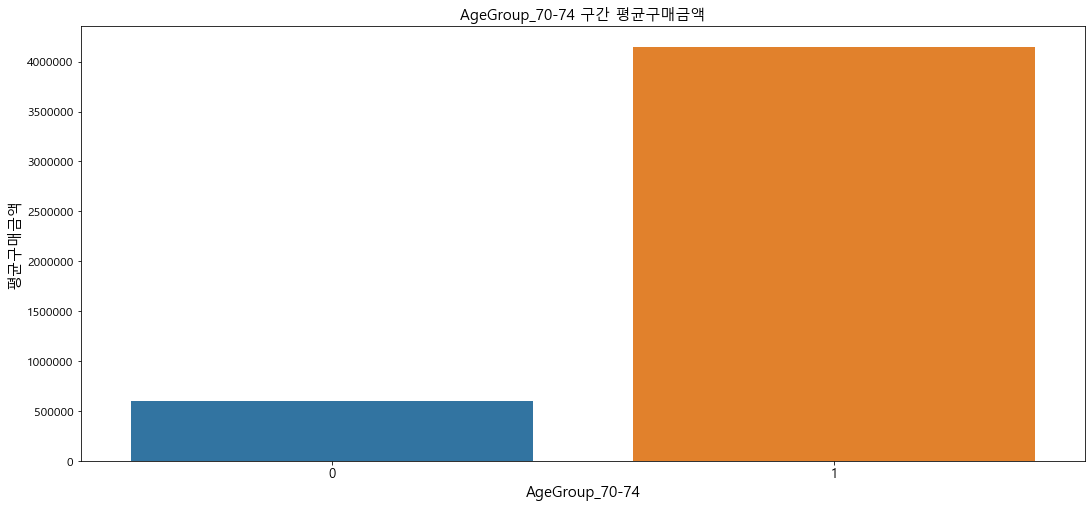

In [60]:
# 3.
# x = AgeGroup_70-74(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("AgeGroup_70-74 구간 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax3 = sns.barplot(data=df_cus_pp_70_m, y='평균구매금액', x='AgeGroup_70-74')

# for label in ax3.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [62]:
# 4.
# 가입_최종주문기간 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_last_m = pd.pivot_table(data=df_cus_pp, index=('가입_최종주문기간'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_last_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_last_m

,가입_최종주문기간,평균구매금액
0,0,132614.11
1,1,203857.27
2,2,165935.10
3,3,250024.83
4,4,235922.65
...,...,...
516,749,113200.00
517,751,684760.00
518,768,2094550.00
519,775,3215310.00


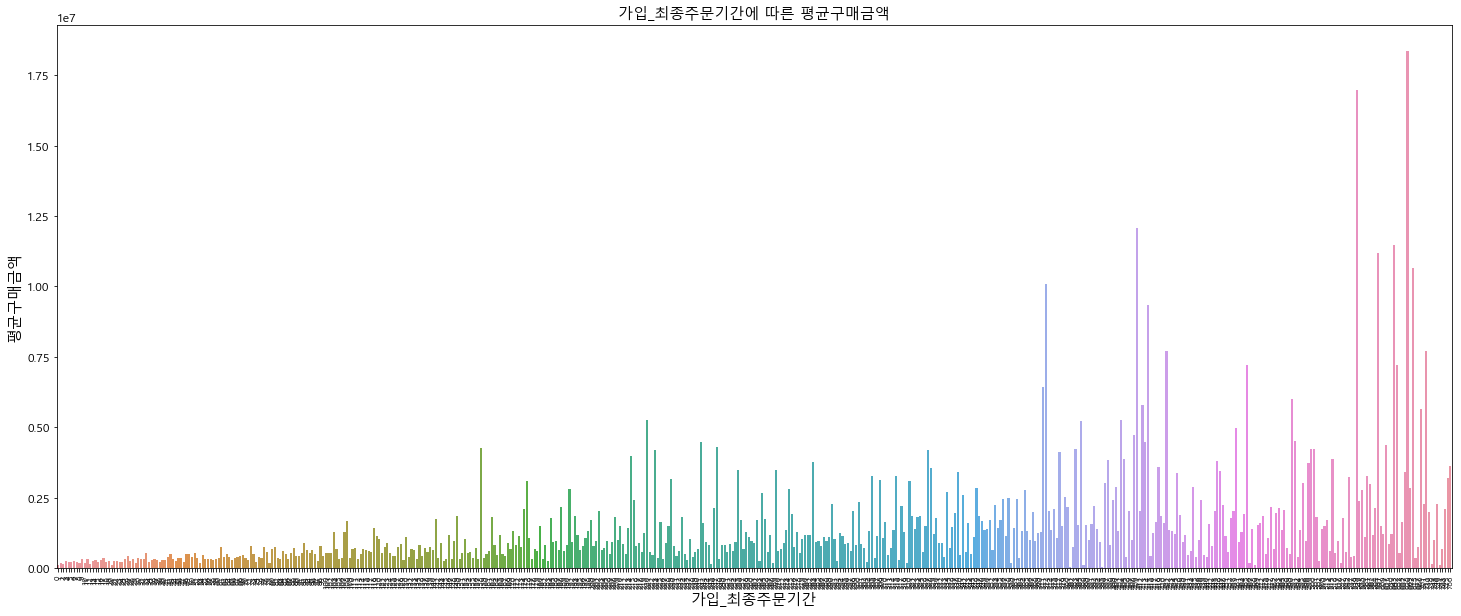

In [67]:
# 4.
# x = 가입_최종주문기간(평균구매금액)

plt.figure(figsize=[25,10])
plt.title("가입_최종주문기간에 따른 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=12)
ax4 = sns.barplot(data=df_cus_pp_last_m, y='평균구매금액', x='가입_최종주문기간')

for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(90)

#### ※ '가입_최종주문기간'은 기준을 정해서 그래프를 그려야 할 듯

In [68]:
# 5.
# 일식 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_jp_m = pd.pivot_table(data=df_cus_pp, index=('일식'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_jp_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_jp_m

,일식,평균구매금액
0,0.00,336723.81
1,1.00,242843.91
2,2.00,400236.02
3,3.00,639833.28
4,4.00,782456.46
5,5.00,805784.18
6,6.00,1472827.76
7,7.00,1610298.28
8,8.00,1644821.32
9,9.00,1397429.51


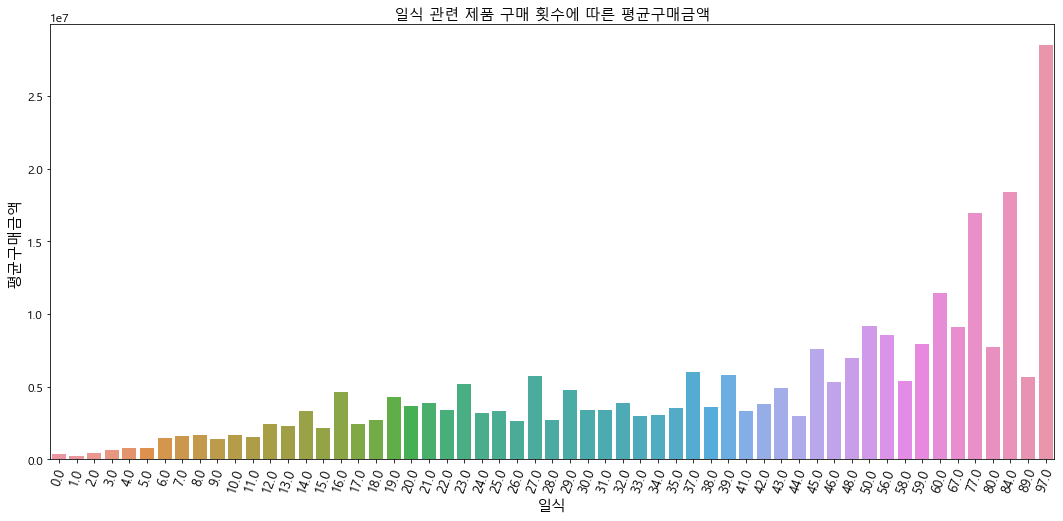

In [70]:
# 5.
# x = 일식(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("일식 관련 제품 구매 횟수에 따른 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax5 = sns.barplot(data=df_cus_pp_jp_m, y='평균구매금액', x='일식')

for label in ax5.xaxis.get_ticklabels():
    label.set_rotation(70)

In [71]:
# 6.
# 유입경로_블로그광고 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_blog_m = pd.pivot_table(data=df_cus_pp_dummy, index=('유입경로_블로그광고'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_blog_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_blog_m

,유입경로_블로그광고,평균구매금액
0,0,637833.49
1,1,378420.81


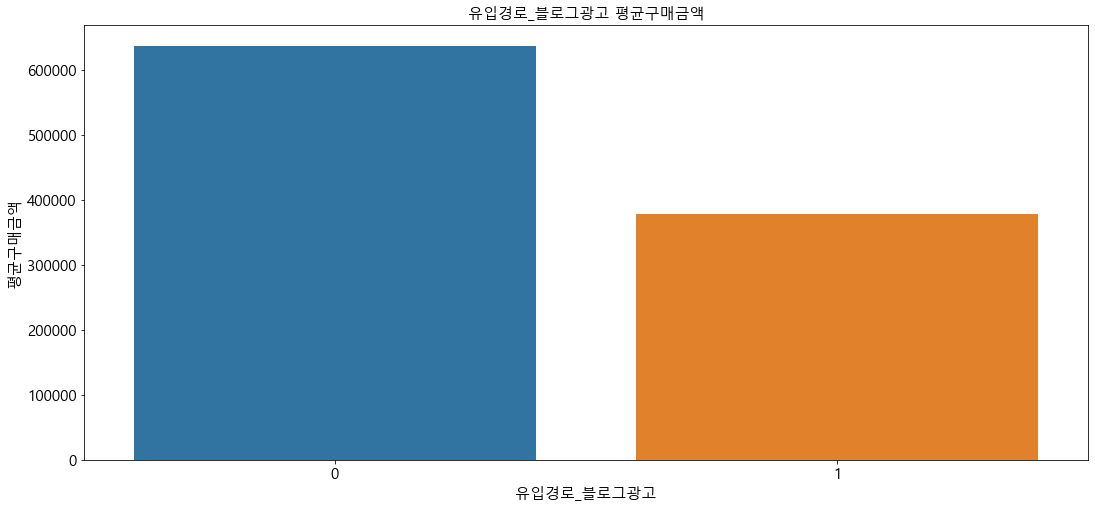

In [73]:
# 6.
# x = 유입경로_블로그광고(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("유입경로_블로그광고 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax6 = sns.barplot(data=df_cus_pp_blog_m, y='평균구매금액', x='유입경로_블로그광고')

# for label in ax6.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [74]:
# 7.
# 유입경로_기타 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_etc_m = pd.pivot_table(data=df_cus_pp_dummy, index=('유입경로_기타'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_etc_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_etc_m

,유입경로_기타,평균구매금액
0,0,591722.90
1,1,887994.63


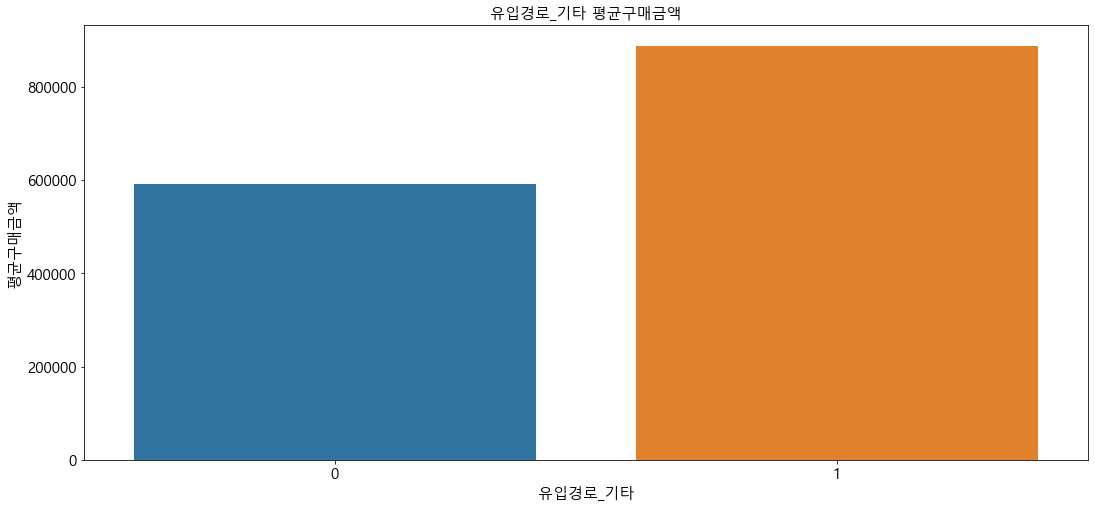

In [75]:
# 7.
# x = 유입경로_기타(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("유입경로_기타 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax7 = sns.barplot(data=df_cus_pp_etc_m, y='평균구매금액', x='유입경로_기타')

# for label in ax7.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [77]:
# 8.
# 성별 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_fm_m = pd.pivot_table(data=df_cus_pp, index=('성별'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_fm_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_fm_m

,성별,평균구매금액
0,남자,507237.36
1,여자,1803135.87


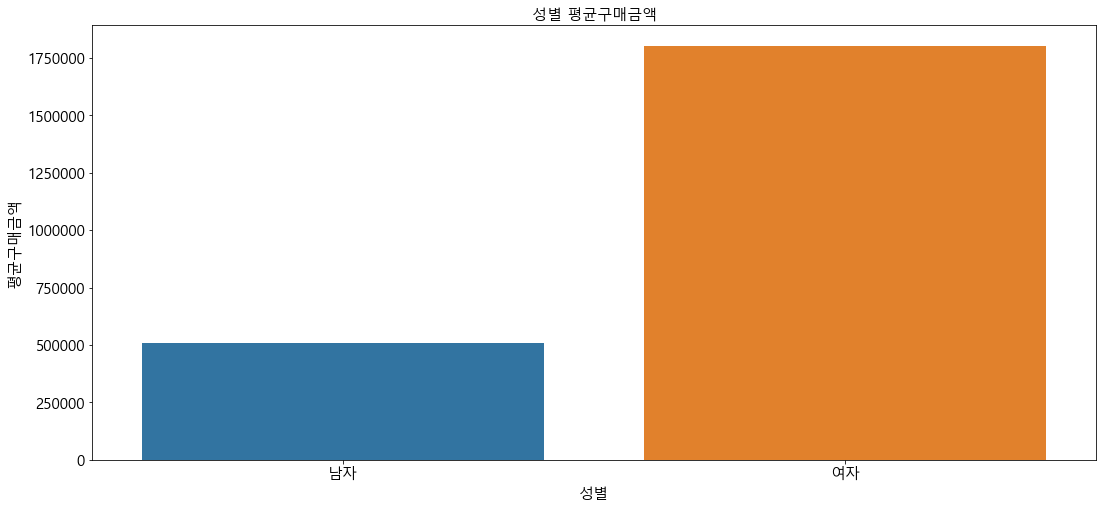

In [78]:
# 8.
# x = 성별(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("성별 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax8 = sns.barplot(data=df_cus_pp_fm_m, y='평균구매금액', x='성별')

# for label in ax8.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [79]:
# 9.
# 회원구분_사업자 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_busi_m = pd.pivot_table(data=df_cus_pp_dummy, index=('회원구분_사업자'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_busi_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_busi_m

,회원구분_사업자,평균구매금액
0,0,511372.85
1,1,798871.47


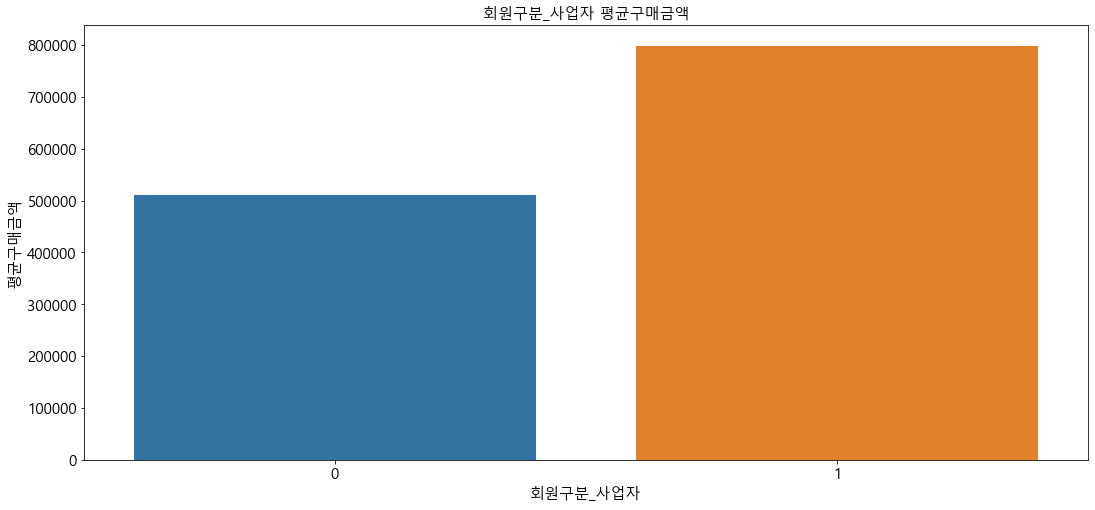

In [80]:
# 9.
# x = 회원구분_사업자(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("회원구분_사업자 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax9 = sns.barplot(data=df_cus_pp_busi_m, y='평균구매금액', x='회원구분_사업자')

# for label in ax9.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [81]:
# 10.
# 카페 - 상품구매금액 mean 피봇테이블 만들기

df_cus_pp_cafe_m = pd.pivot_table(data=df_cus_pp, index=('카페'),values=['상품구매금액'],aggfunc='mean').reset_index()

df_cus_pp_cafe_m.rename(columns={'상품구매금액':'평균구매금액'}, inplace=True)
df_cus_pp_cafe_m

,카페,평균구매금액
0,0.00,618144.85
1,1.00,530403.32
2,2.00,199384.38
3,3.00,321345.13
4,4.00,250186.50
5,5.00,266225.71
6,6.00,314154.00
7,7.00,453462.86
8,8.00,398675.00
9,9.00,838125.00


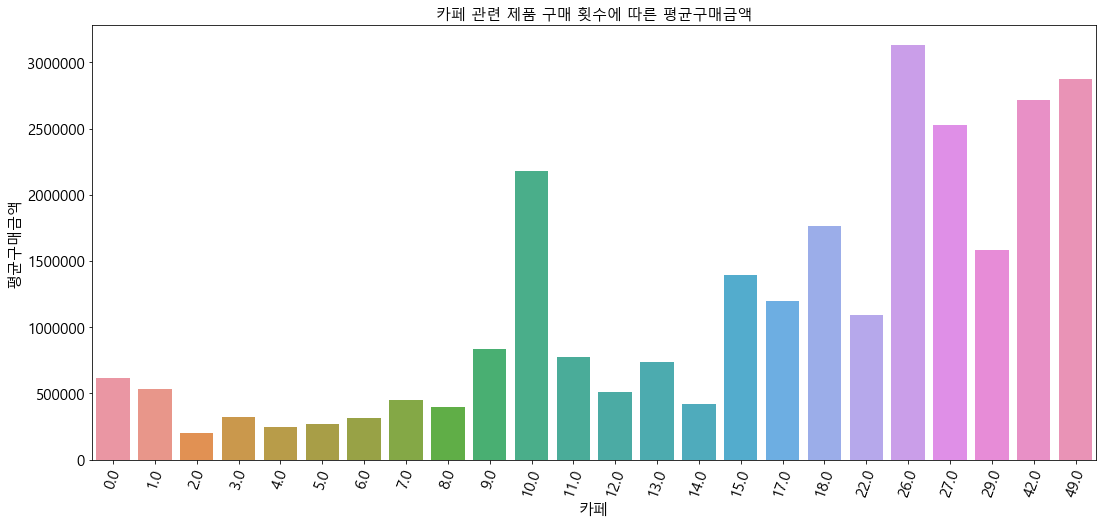

In [82]:
# 10.
# x = 카페(평균구매금액)

plt.figure(figsize=[18,8])
plt.title("카페 관련 제품 구매 횟수에 따른 평균구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax10 = sns.barplot(data=df_cus_pp_cafe_m, y='평균구매금액', x='카페')

for label in ax10.xaxis.get_ticklabels():
    label.set_rotation(70)

# =========================================================

# 각 중요도에 대한 시각화 - 전체상품금액 기준

In [23]:
# 1. 
# 중식 - 상품구매금액 sum 피봇테이블 만들기

df_cus_pp_chi_sum = pd.pivot_table(data=df_cus_pp, index=('중식'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_cus_pp_chi_sum

,중식,상품구매금액
0,0.0,514632225
1,1.0,203965430
2,2.0,159750615
3,3.0,162124290
4,4.0,132734485
...,...,...
67,109.0,19956830
68,116.0,18170120
69,134.0,14615130
70,148.0,28514575


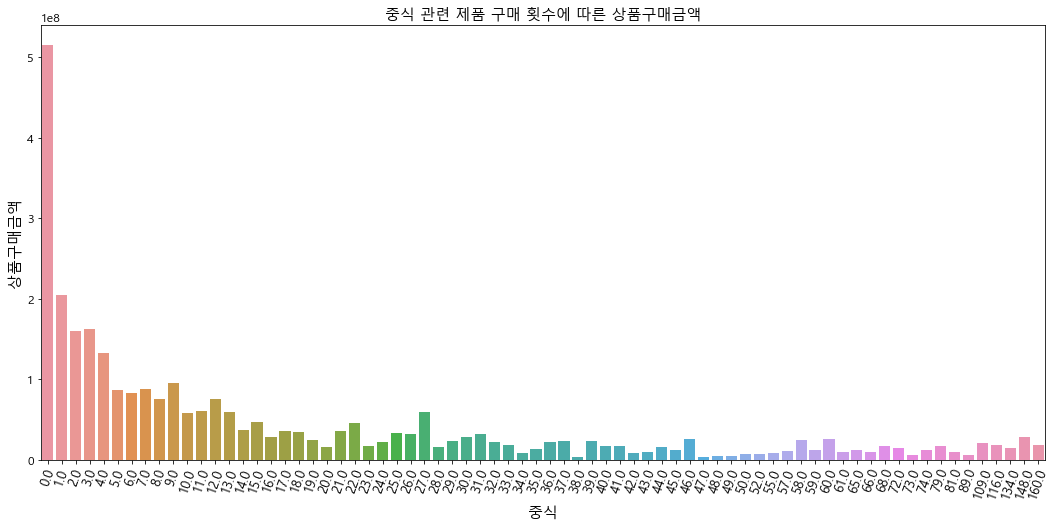

In [26]:
# 1. 
# x = 중식(전체 상품구매금액)

plt.figure(figsize=[18,8])
plt.title("중식 관련 제품 구매 횟수에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax1 = sns.barplot(data=df_cus_pp_chi_sum, y='상품구매금액', x='중식')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(70)

In [10]:
# 2. 
# 한식 - 상품구매금액 sum 피봇테이블 만들기

df_cus_pp_kor_sum = pd.pivot_table(data=df_cus_pp, index=('한식'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_cus_pp_kor_sum

,한식,상품구매금액
0,0.0,621987390
1,1.0,160759760
2,2.0,158479305
3,3.0,134365535
4,4.0,121517945
...,...,...
68,112.0,11740600
69,115.0,18170120
70,116.0,9105510
71,121.0,12080490


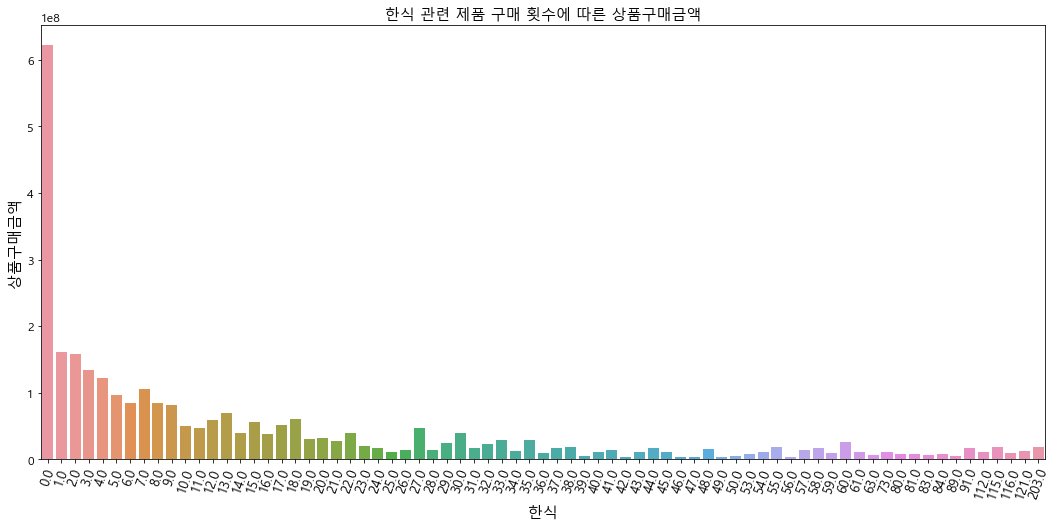

In [22]:
# 2. 
# x = 한식(전체 상품구매금액)

plt.figure(figsize=[18,8])
plt.title("한식 관련 제품 구매 횟수에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax2 = sns.barplot(data=df_cus_pp_kor_sum, y='상품구매금액', x='한식')

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(70)

In [33]:
# 3. 
# AgeGroup_70-74 - 상품구매금액 sum 피봇테이블 만들기

df_cus_pp_70_sum = pd.pivot_table(data=df_cus_pp_dummy, index=('AgeGroup_70-74'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_cus_pp_70_sum

,AgeGroup_70-74,상품구매금액
0,0,2924290535
1,1,41502610


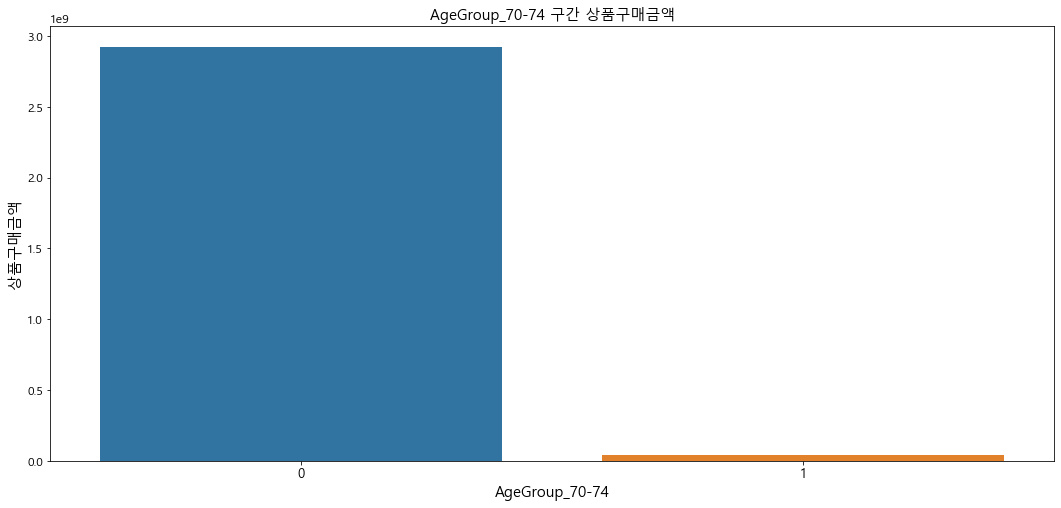

In [36]:
# 3. 
# x = AgeGroup_70-74(전체 상품구매금액)

plt.figure(figsize=[18,8])
plt.title("AgeGroup_70-74 구간 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax3 = sns.barplot(data=df_cus_pp_70_sum, y='상품구매금액', x='AgeGroup_70-74')

# for label in ax3.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [41]:
# 4. 
# 가입_최종주문기간 - 상품구매금액 sum 피봇테이블 만들기

df_cus_pp_last_sum = pd.pivot_table(data=df_cus_pp, index=('가입_최종주문기간'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_cus_pp_last_sum

,가입_최종주문기간,상품구매금액
0,0,266686975
1,1,24259015
2,2,8628625
3,3,7250720
4,4,4010685
...,...,...
516,749,113200
517,751,684760
518,768,2094550
519,775,3215310


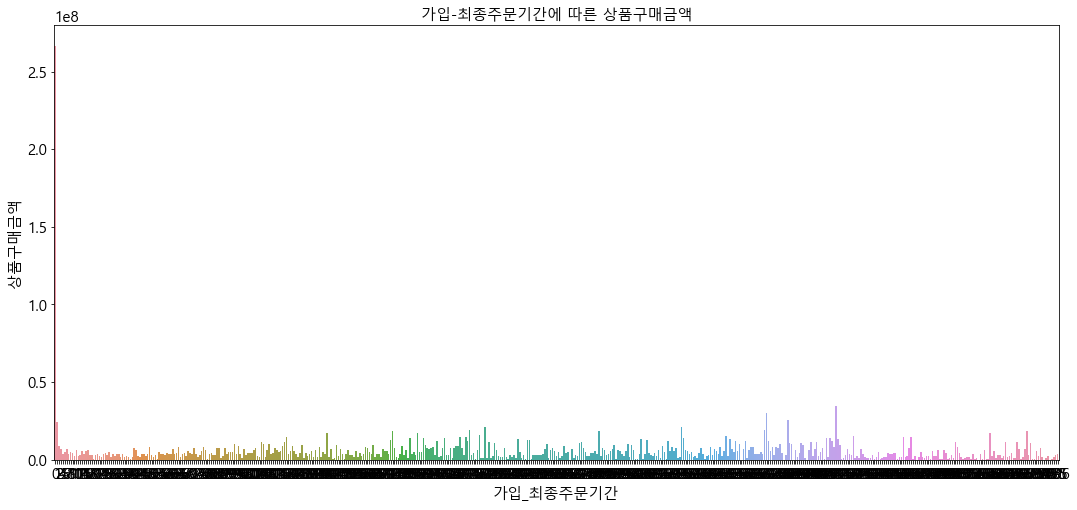

In [42]:
# 4. 
# x = 가입_최종주문기간(전체 상품구매금액)

plt.figure(figsize=[18,8])
plt.title("가입-최종주문기간에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax4 = sns.barplot(data=df_cus_pp_last_sum, y='상품구매금액', x='가입_최종주문기간')

# for label in ax4.xaxis.get_ticklabels():
#     label.set_rotation(70)

In [46]:
# 5. 
# 일식 - 상품구매금액 sum 피봇테이블 만들기

df_cus_pp_jp_sum = pd.pivot_table(data=df_cus_pp, index=('일식'),values=['상품구매금액'],aggfunc='sum').reset_index()
df_cus_pp_jp_sum

,일식,상품구매금액
0,0.0,704089490
1,1.0,269313895
2,2.0,225332880
3,3.0,206666150
4,4.0,139277250
5,5.0,83801555
6,6.0,141391465
7,7.0,107889985
8,8.0,93754815
9,9.0,57294610


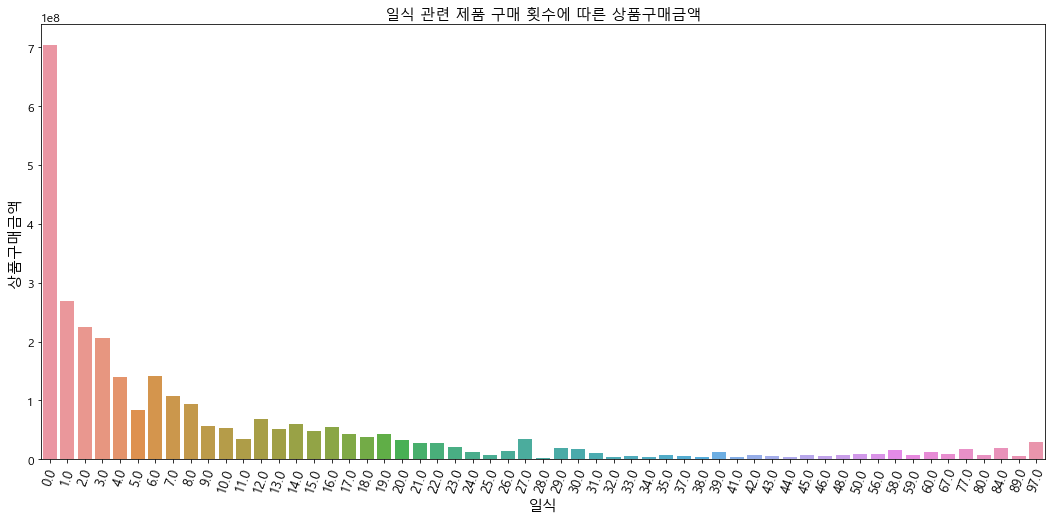

In [47]:
# 5.
# x = 일식(전체 상품구매금액)

plt.figure(figsize=[18,8])
plt.title("일식 관련 제품 구매 횟수에 따른 상품구매금액")
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)
ax5 = sns.barplot(data=df_cus_pp_jp_sum, y='상품구매금액', x='일식')

for label in ax5.xaxis.get_ticklabels():
    label.set_rotation(70)